In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [8]:
# import results - change path for AF2 and AF3

path_AF2 = 'Results/deform_h3_h6_results_AF2.csv'
path_AF3 = 'Results/deform_h3_h6_results_AF3.csv'

final_results_AF2 = pd.read_csv(path_AF2)
final_results_AF3 = pd.read_csv(path_AF3)

In [10]:
def plot_deformations_class(results):
    # Create the scatter plot using seaborn


    width = 1.5
    fig, ax1 = plt.subplots(figsize=[5, 3], dpi=600)

    for axis in ['top', 'bottom', 'left', 'right']:
        ax1.spines[axis].set_linewidth(width)

    tick_width = 0.5
    plt.tick_params(direction='in', width=tick_width)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.xlabel('Activity level (%)', fontsize=12)
    plt.ylabel('Average Deformation ($\AA$)', fontsize=12)


    scatter_plot = sns.scatterplot(
        data=results,
        y='Average Distance',
        x='Activity_level',
        hue='Class',
        palette='Dark2',
        s = 50,
    )


    scatter_plot.legend(title='Class', fontsize=7, title_fontsize=8, loc = 'upper center')

    

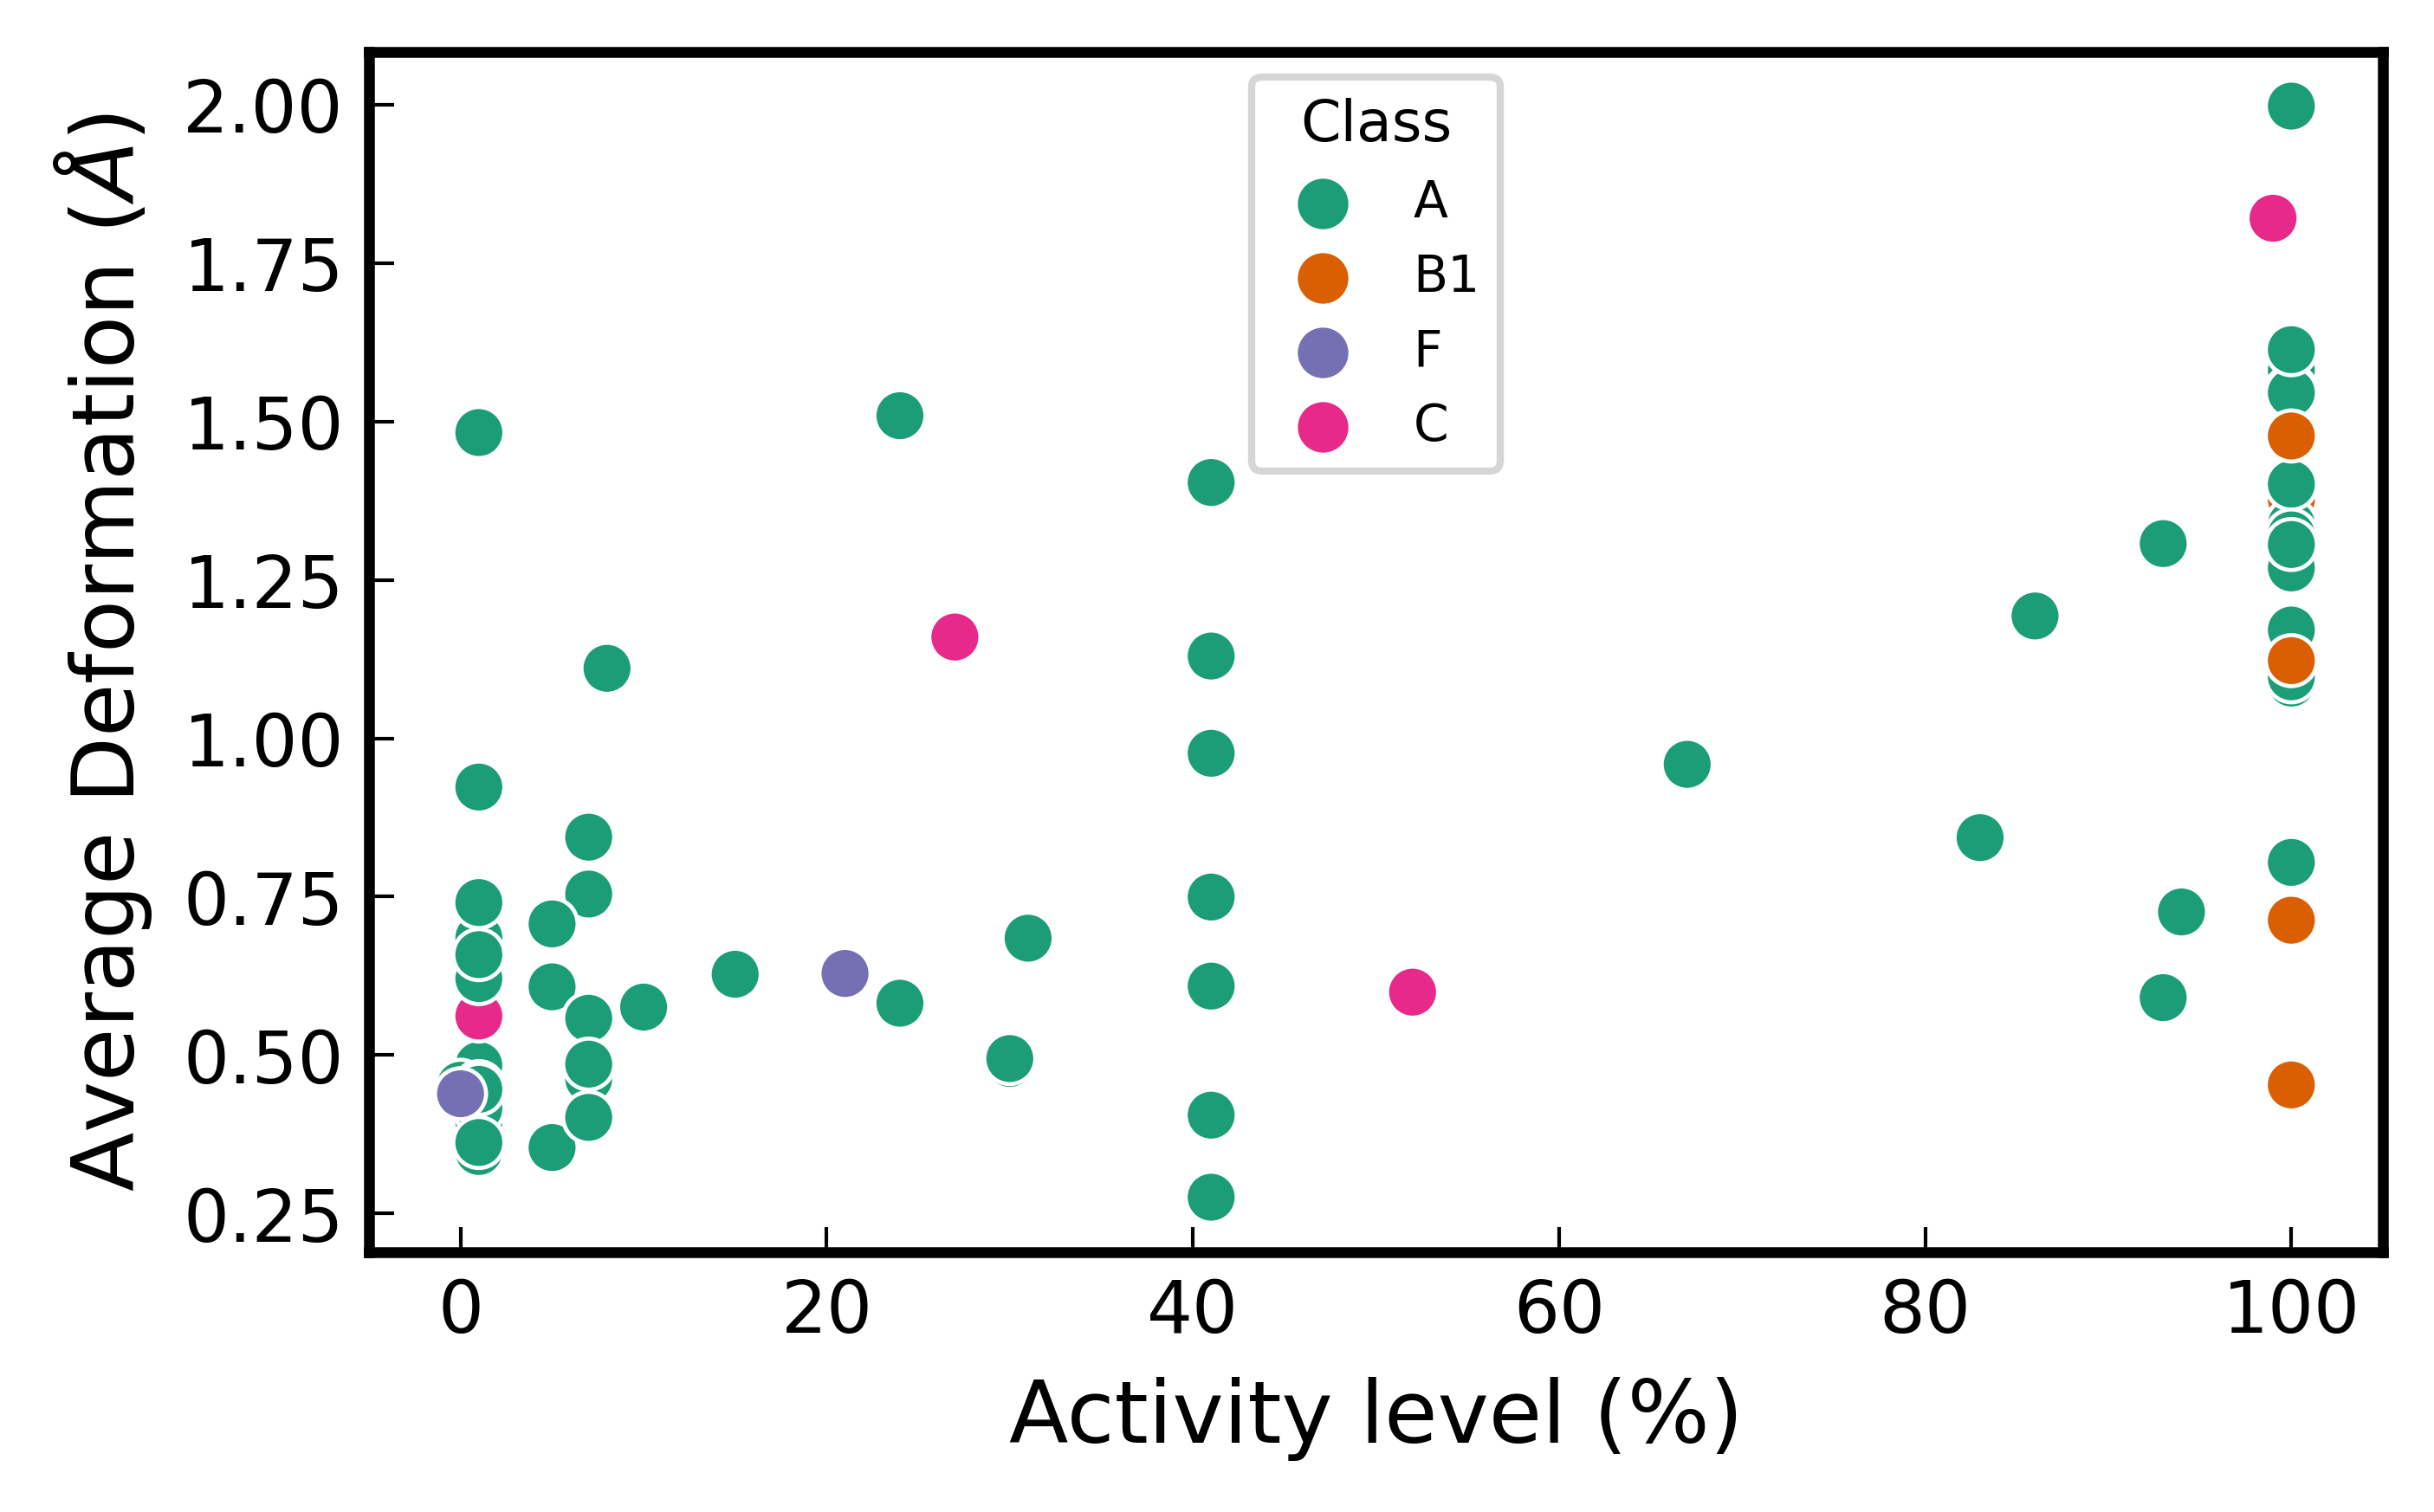

In [11]:
# plotting average deformations for AF2 with points colored by class
plot_deformations_class(final_results_AF2)


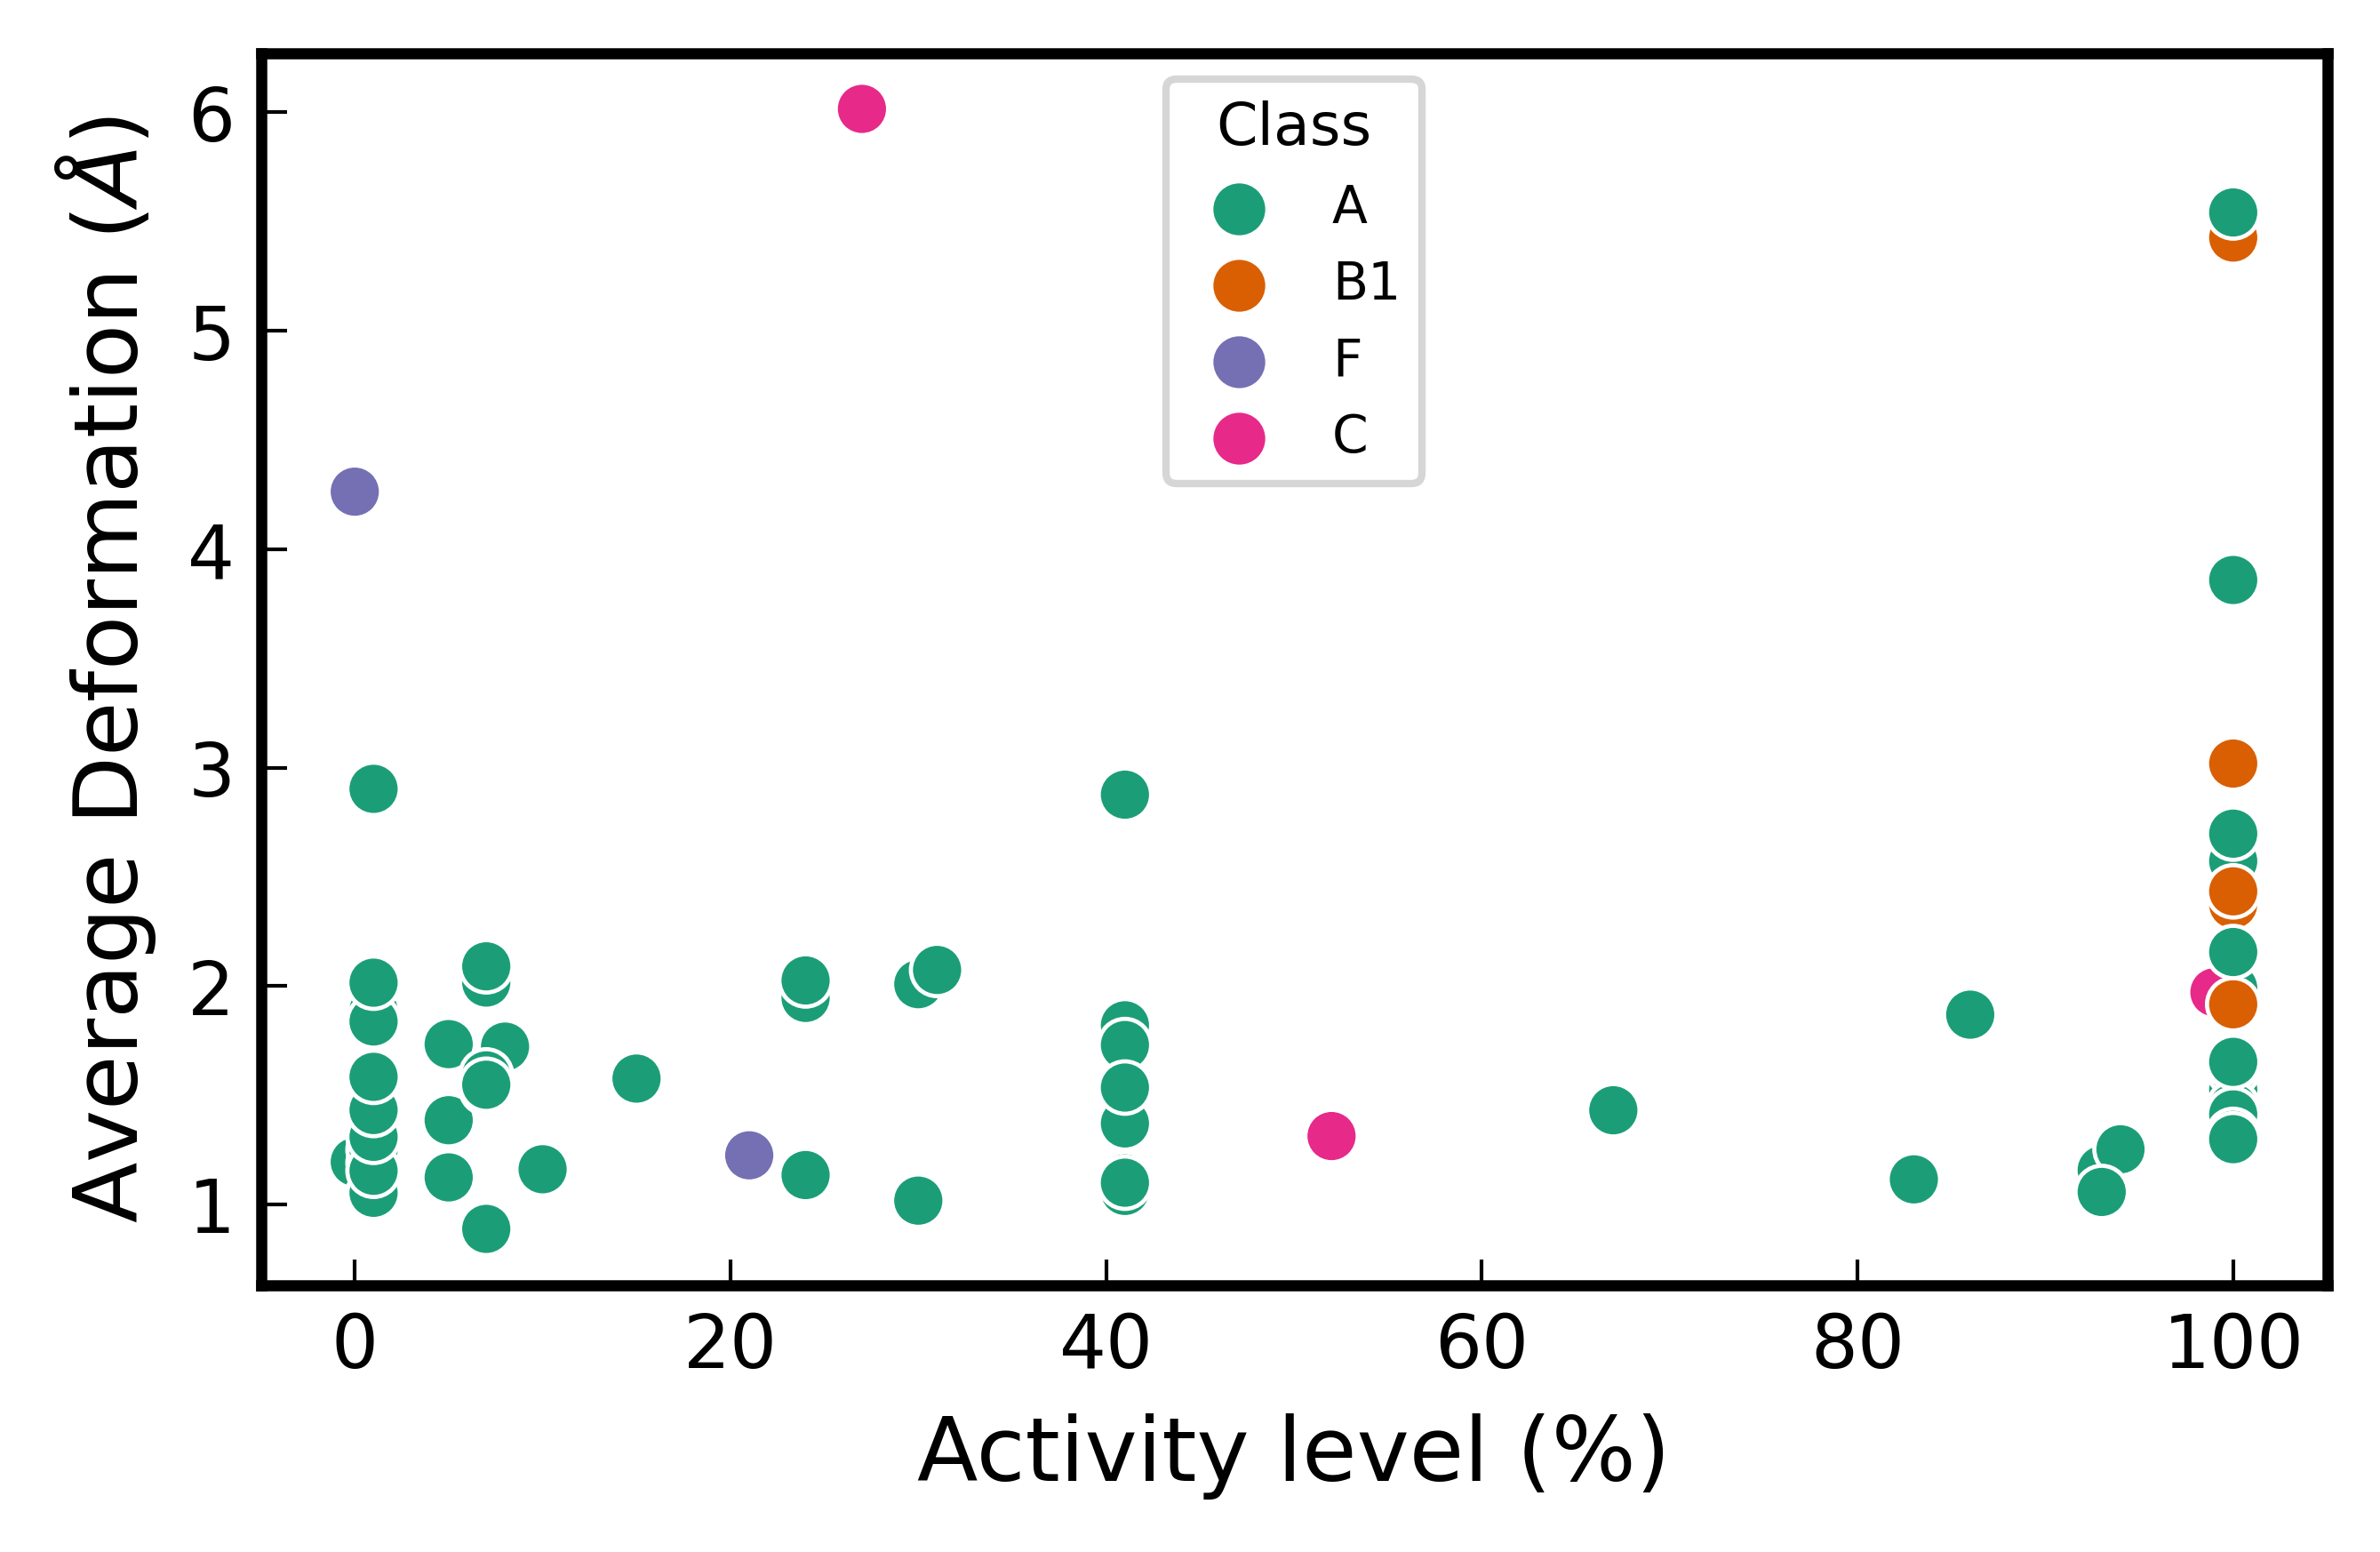

In [12]:
# plotting average deformations for AF3 with points colored by class
plot_deformations_class(final_results_AF3)

In [13]:
# tsne plot with points colored by average deformation
from sklearn.manifold import TSNE
from collections import Counter


def tsne(data, lr, name):
    class_list = []
    deformations_list = []
    for i, _ in enumerate(data):
        cwxp_class = data[i]['class']
        class_list.append(cwxp_class)
        deformations = data[i]['deformation']
        deformations_list.append(deformations)

    cls_list = []
    for i, _ in enumerate(data):
        cls = data[i]['cls']
        cls_list.append(cls)

    cls_list_np = np.array(cls_list)
    print(cls_list_np.shape)

    cls_df = pd.DataFrame(cls_list_np)
    model = TSNE(learning_rate=lr, random_state=0)  # lr = 10 ~ 1000

    tsne_features = model.fit_transform(cls_df)  # turn high dimension to 2 dimension (2 columns)
    cls_df['x'] = tsne_features[:,0]
    cls_df['y'] = tsne_features[:,1]

    width = 1.5
    fig, ax1 = plt.subplots(figsize=[5, 3], dpi=600)

    for axis in ['top', 'bottom', 'left', 'right']:
        ax1.spines[axis].set_linewidth(width)

    tick_width = 0.5
    plt.tick_params(direction='in', width=tick_width)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.xlabel('t-SNE 1', fontsize=12)
    plt.ylabel('t-SNE 2', fontsize=12)

    # Convert deformations_list to numpy array for color mapping
    deformations_np = np.array(deformations_list)

    # Create the scatter plot with color bar
    scatter = ax1.scatter(x=cls_df['x'], y=cls_df['y'], c=deformations_np, cmap='Dark2',edgecolors='white', linewidth=0.5)
    cbar = fig.colorbar(scatter, ax=ax1, label='Deformation')
    
    

    plt.show()


In [14]:
# tsne plot with points colored by class
def tsne_class(data, lr, name):
  class_list = []
  deformations_list = []
  for i, _ in enumerate(data):
    cwxp_class = data[i]['class']
    class_list.append(cwxp_class)
    deformations = data[i]['deformation']
    deformations_list.append(deformations)


  cls_list = []
  for i, _ in enumerate(data):
    cls = data[i]['cls']
    cls_list.append(cls)

  cls_list_np = np.array(cls_list)
  print(cls_list_np.shape)

  cls_df = pd.DataFrame(cls_list_np)
  model = TSNE(learning_rate = lr, random_state=0) # lr = 10 ~ 1000

  tsne_features = model.fit_transform(cls_df) # turn high dimension to 2 dimension(2 column)
  cls_df['x'] = tsne_features[:,0]
  cls_df['y'] = tsne_features[:,1]

  width = 1.5
  fig, ax1 = plt.subplots(figsize = [5,3], dpi = 600)

  for axis in ['top', 'bottom', 'left', 'right']:
      ax1.spines[axis].set_linewidth(width)

  tick_width = 0.5
  plt.tick_params(direction = 'in', width = tick_width)
  plt.xticks(fontsize = 10)
  plt.yticks(fontsize = 10)
  plt.xlabel('t-SNE 1', fontsize = 12)
  plt.ylabel('t-SNE 2', fontsize = 12)

  scatterplot = sns.scatterplot(x='x',y='y', hue=class_list, data=cls_df)
  scatterplot.legend(loc = (1.1,-1))
  #sns.scatterplot(df)

  
  plt.show()

In [18]:
# importing embeddings from GPCR-BERT
npxxy = np.load("Data/final_NPxxY_full_cls_pdb_class.npy", allow_pickle=True)

In [19]:
# adding deformations to npxxy
def updated_npxxy2(results, npxxy):


    class_freq = {}
    for d in npxxy:
        if d['class'] in class_freq:
            class_freq[d['class']] += 1
        else:
            class_freq[d['class']] = 1

    # Remove dictionaries with unique classes
    npxxy2 = [d for d in npxxy if class_freq[d['class']] > 3]

    class_list = []
    for i, _ in enumerate(npxxy2):
        clas = npxxy2[i]['class']
        class_list.append(clas)
    names_set = set(results['Protein'].str.lower().tolist())

    updated_npxxy2 = []
    for n in npxxy2:
        pdb = n['pdb'].split('/')[-1].split('_')[0].lower()
        if pdb in names_set:
            n['deformation'] = results[results['Protein'].str.lower() == pdb]['Average Distance'].values[0]
            updated_npxxy2.append(n)

    npxxy2 = updated_npxxy2

    return npxxy2
        


In [20]:
npxxy2_AF2 = updated_npxxy2(final_results_AF2, npxxy)

(150, 1024)


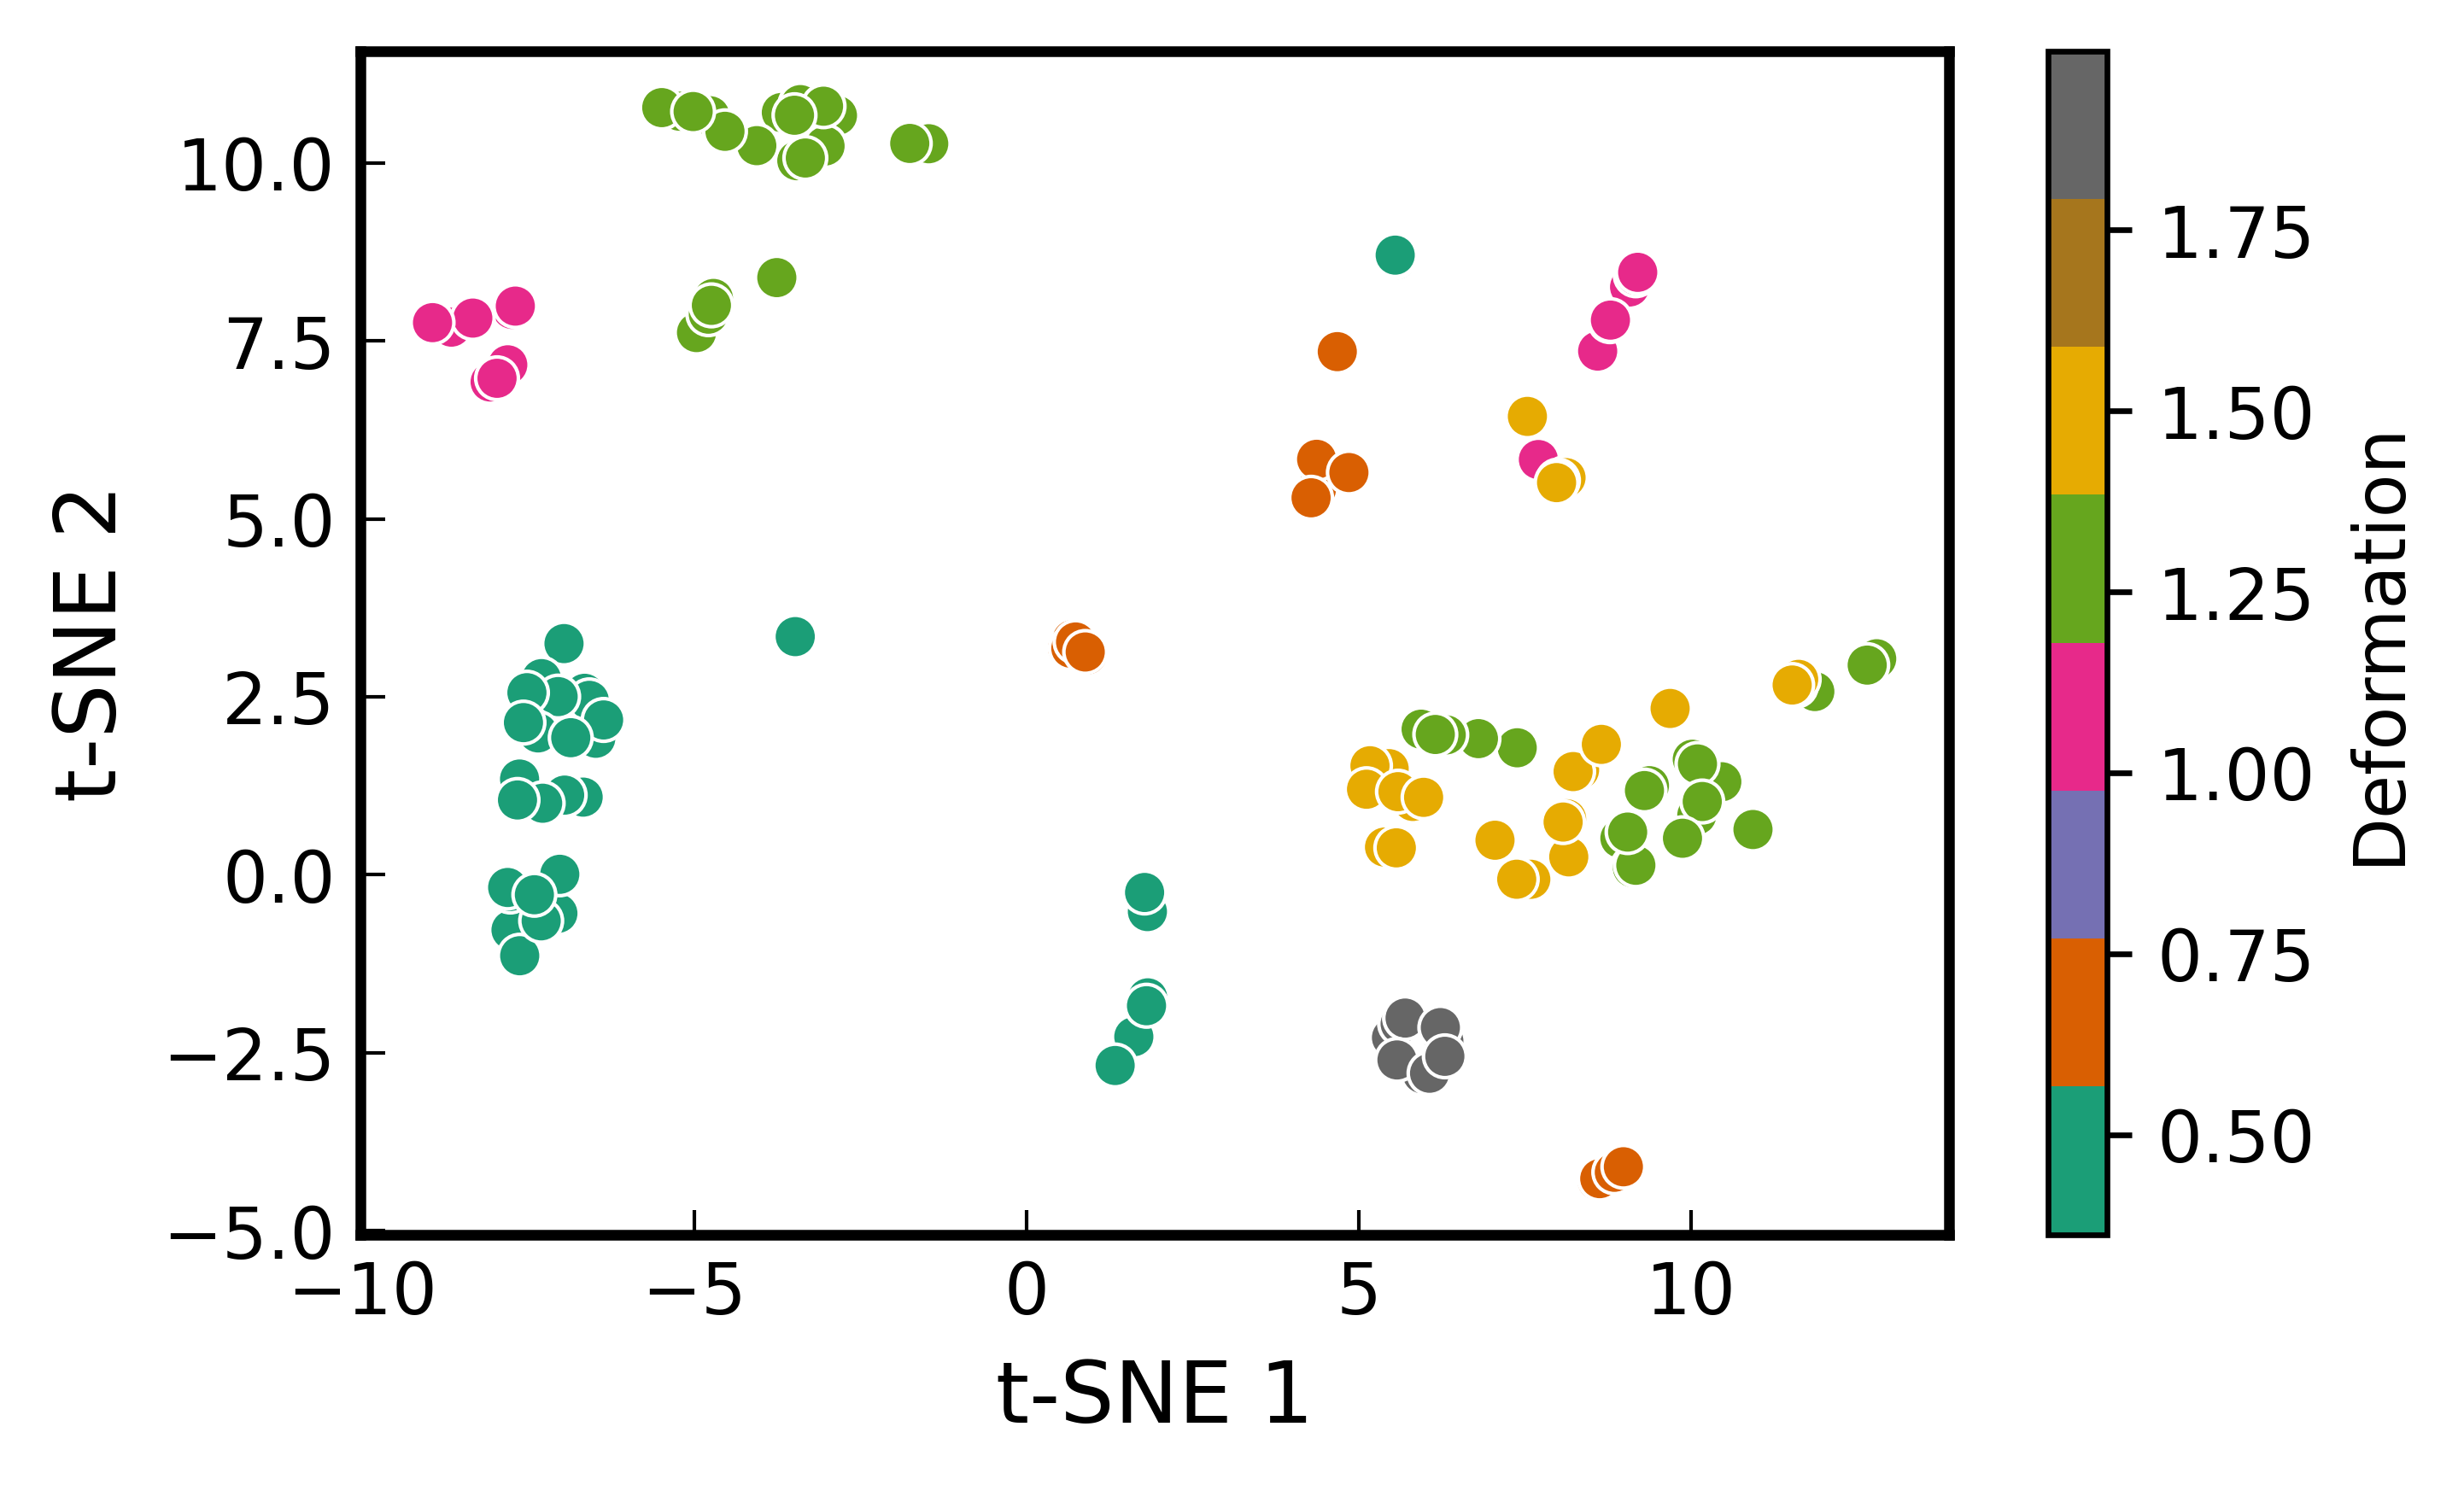

In [21]:
# plotting tsne with deformation results for AF2
tsne(npxxy2_AF2, 300, name = 'GPCR')

(150, 1024)


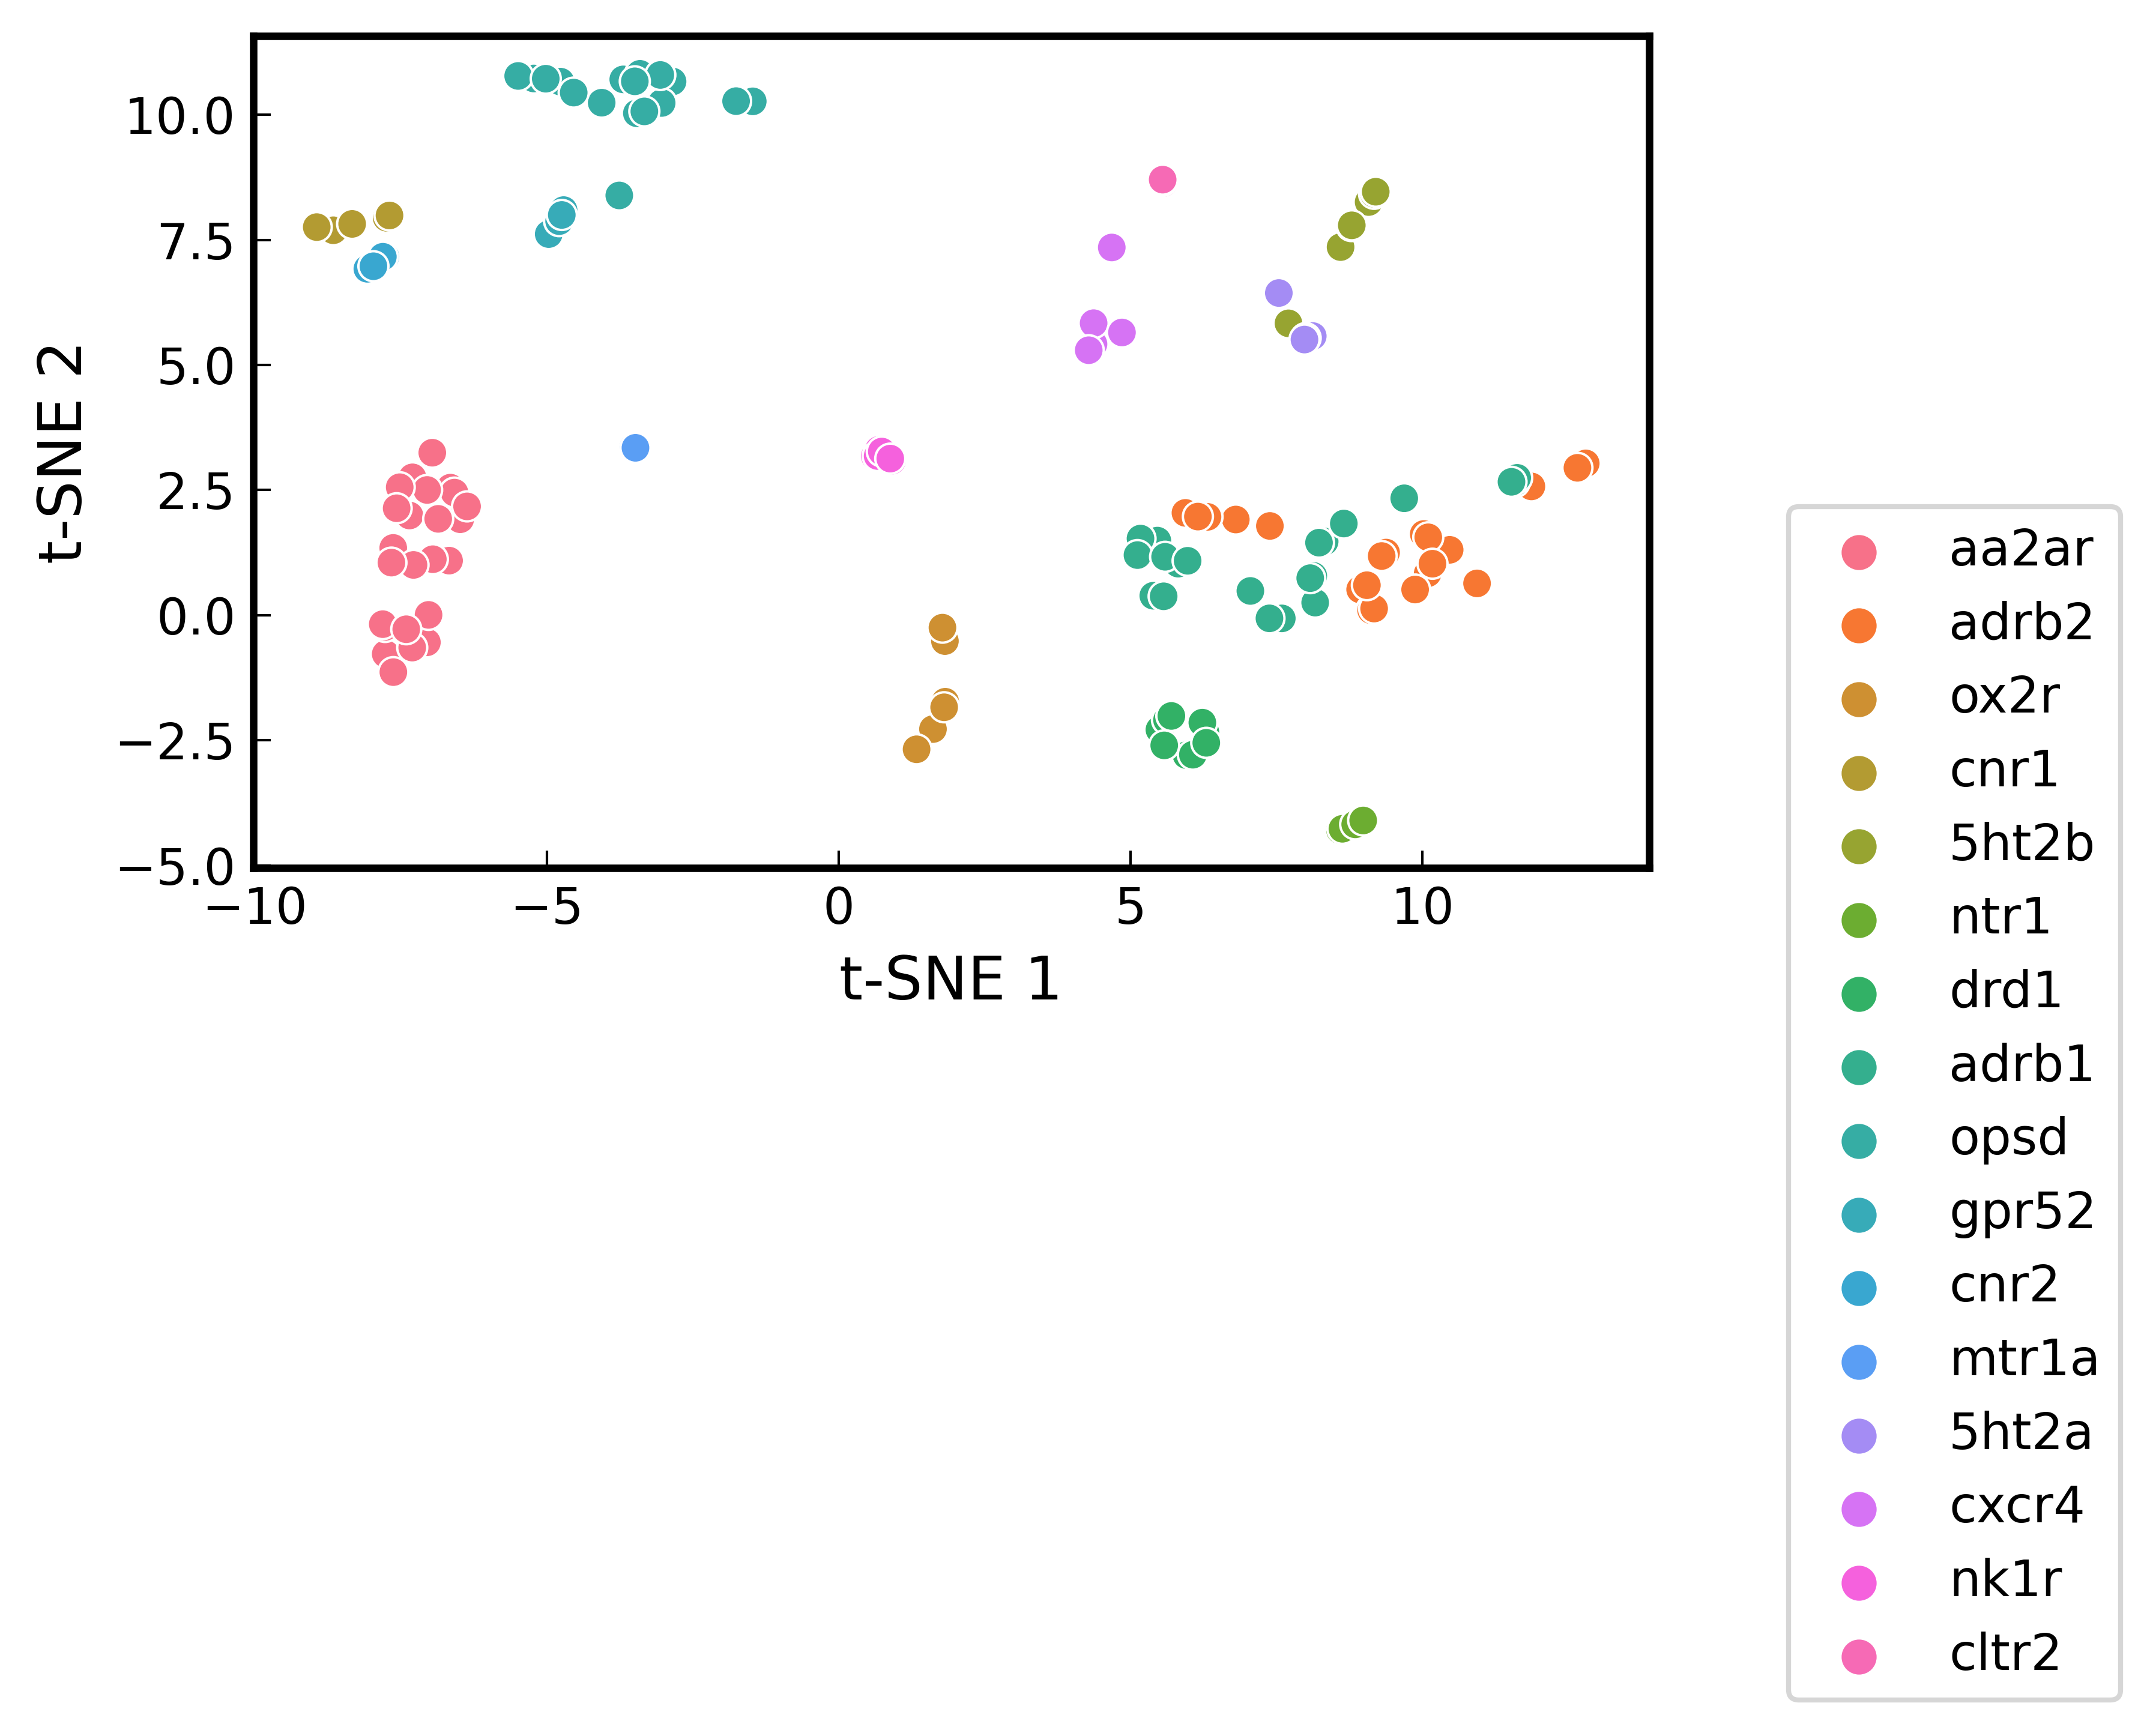

In [22]:
tsne_class(npxxy2_AF2, 300, name = 'GPCR')

In [23]:
npxxy2_af3 = updated_npxxy2(final_results_AF3, npxxy)


(150, 1024)


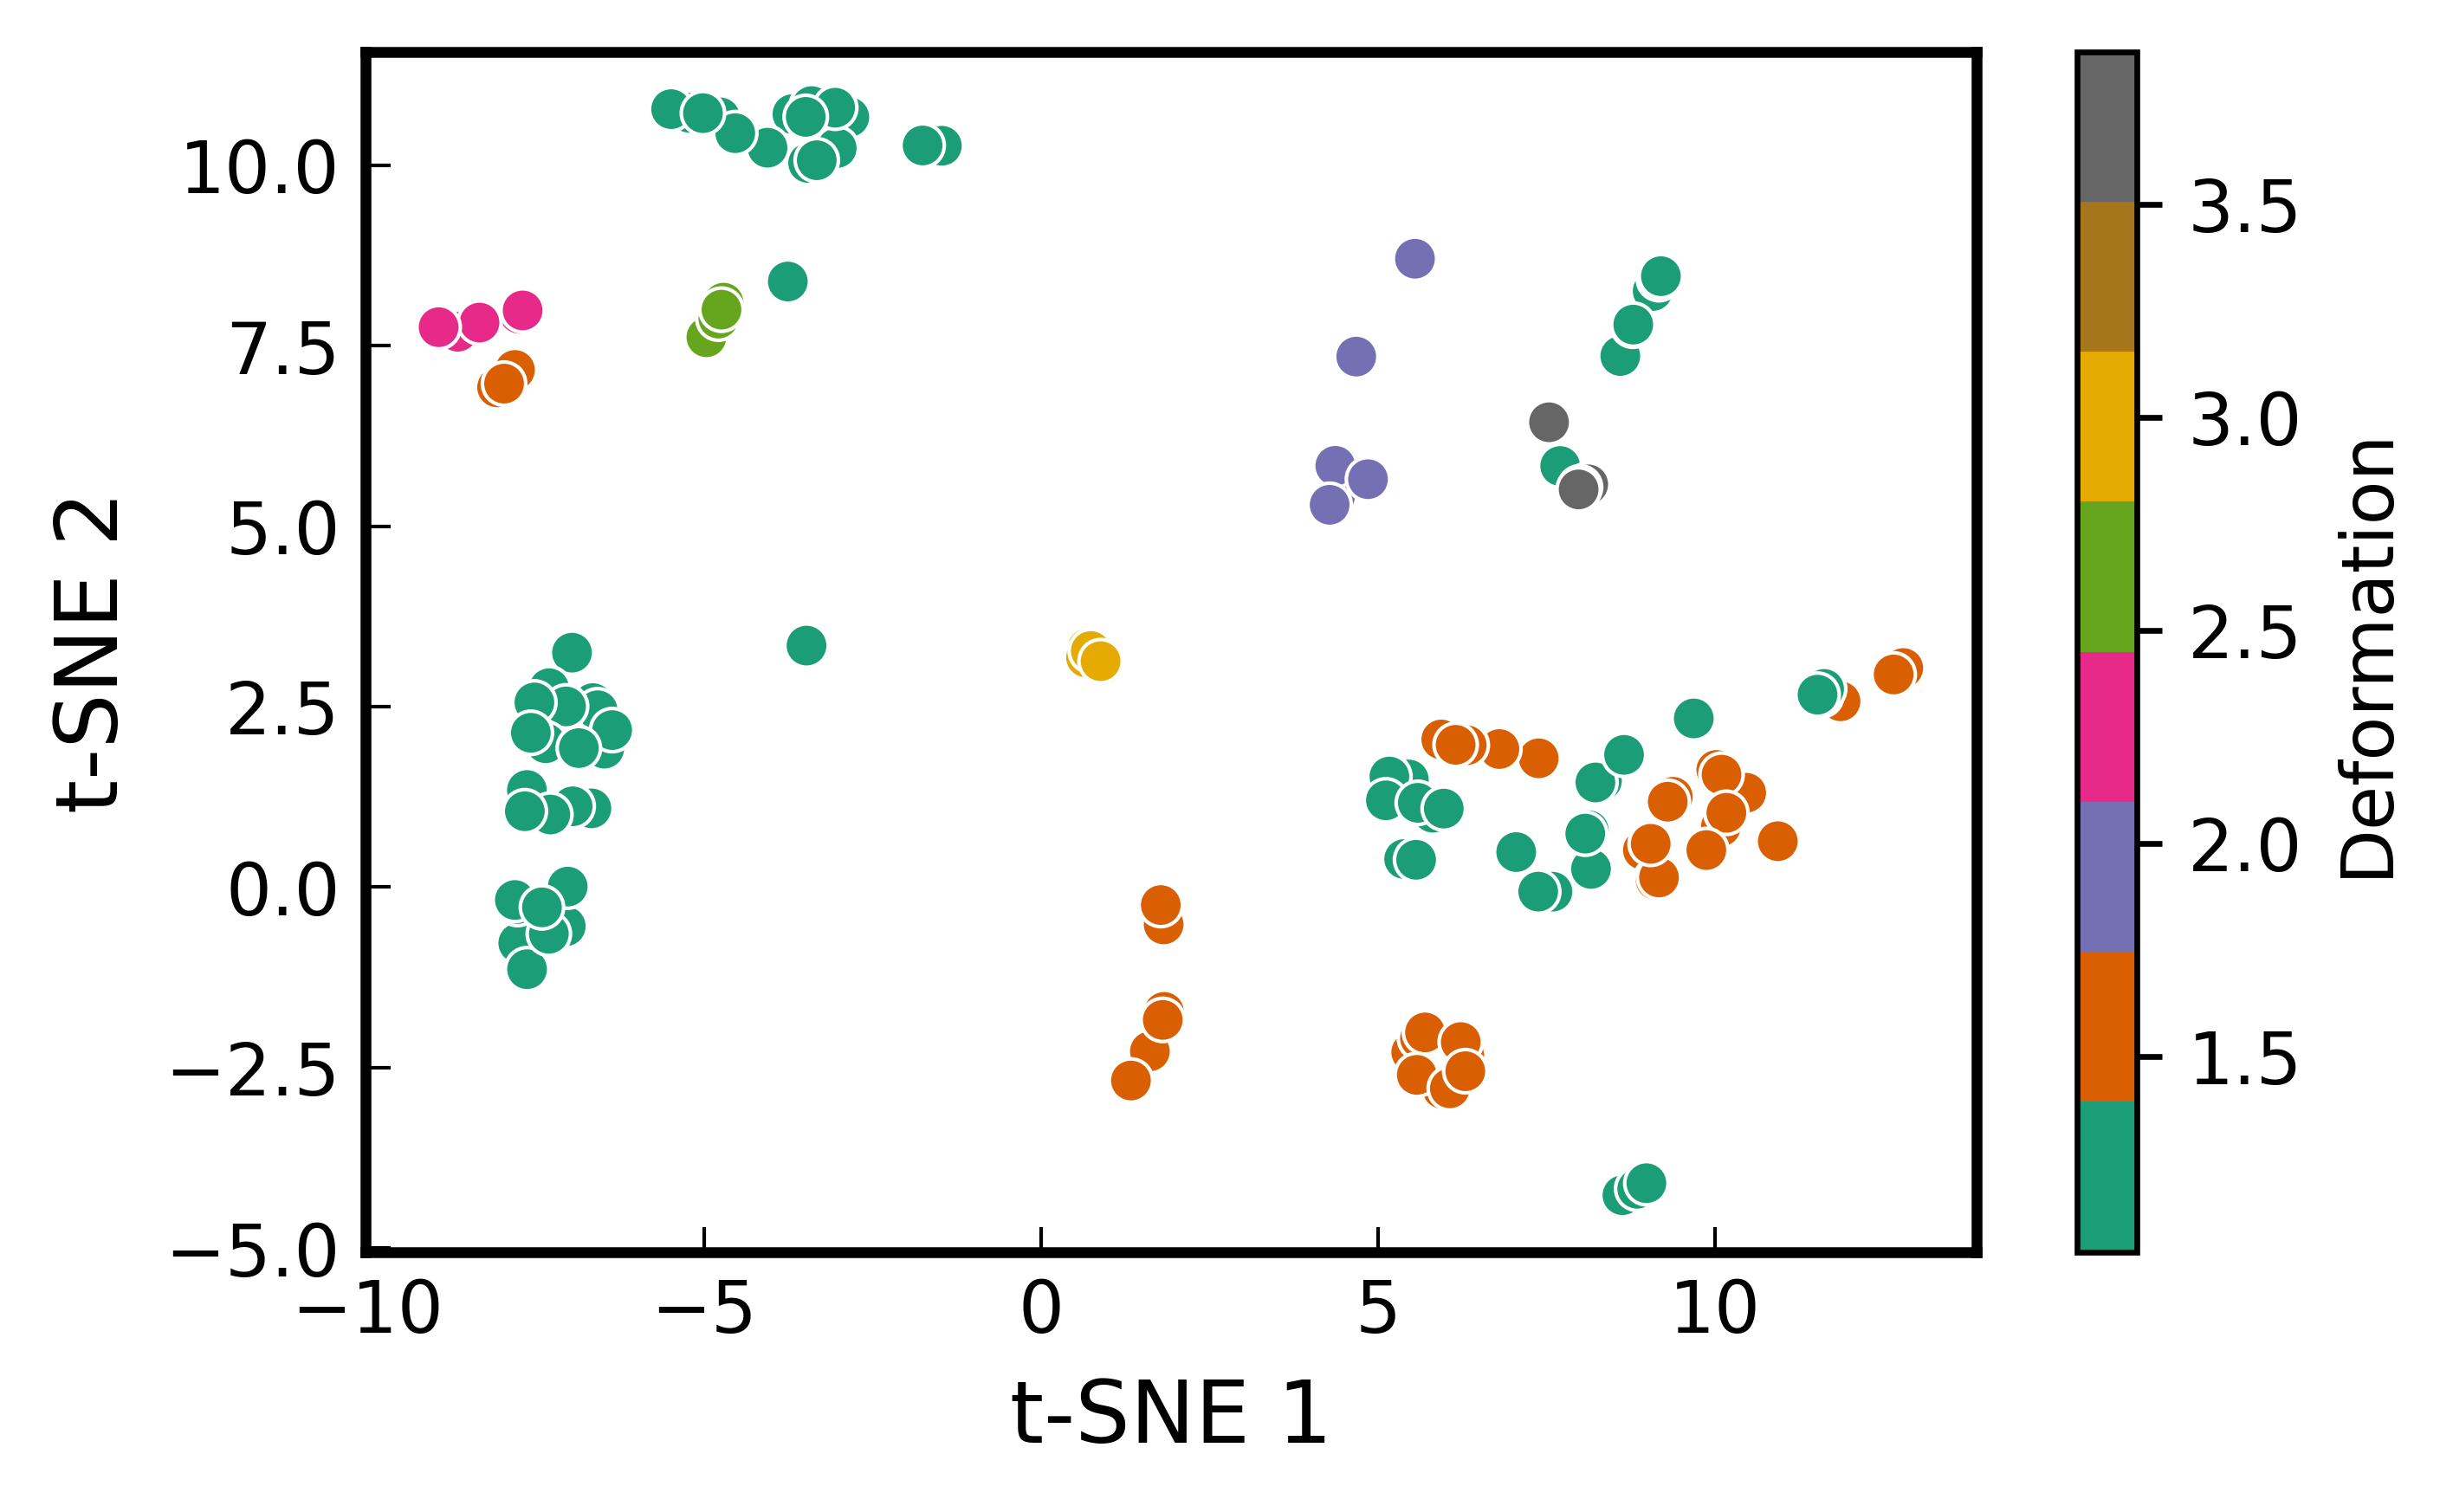

In [24]:
# plotting tsne with deformation results for AF3
tsne(npxxy2_af3, 300, name = 'GPCR')

(150, 1024)


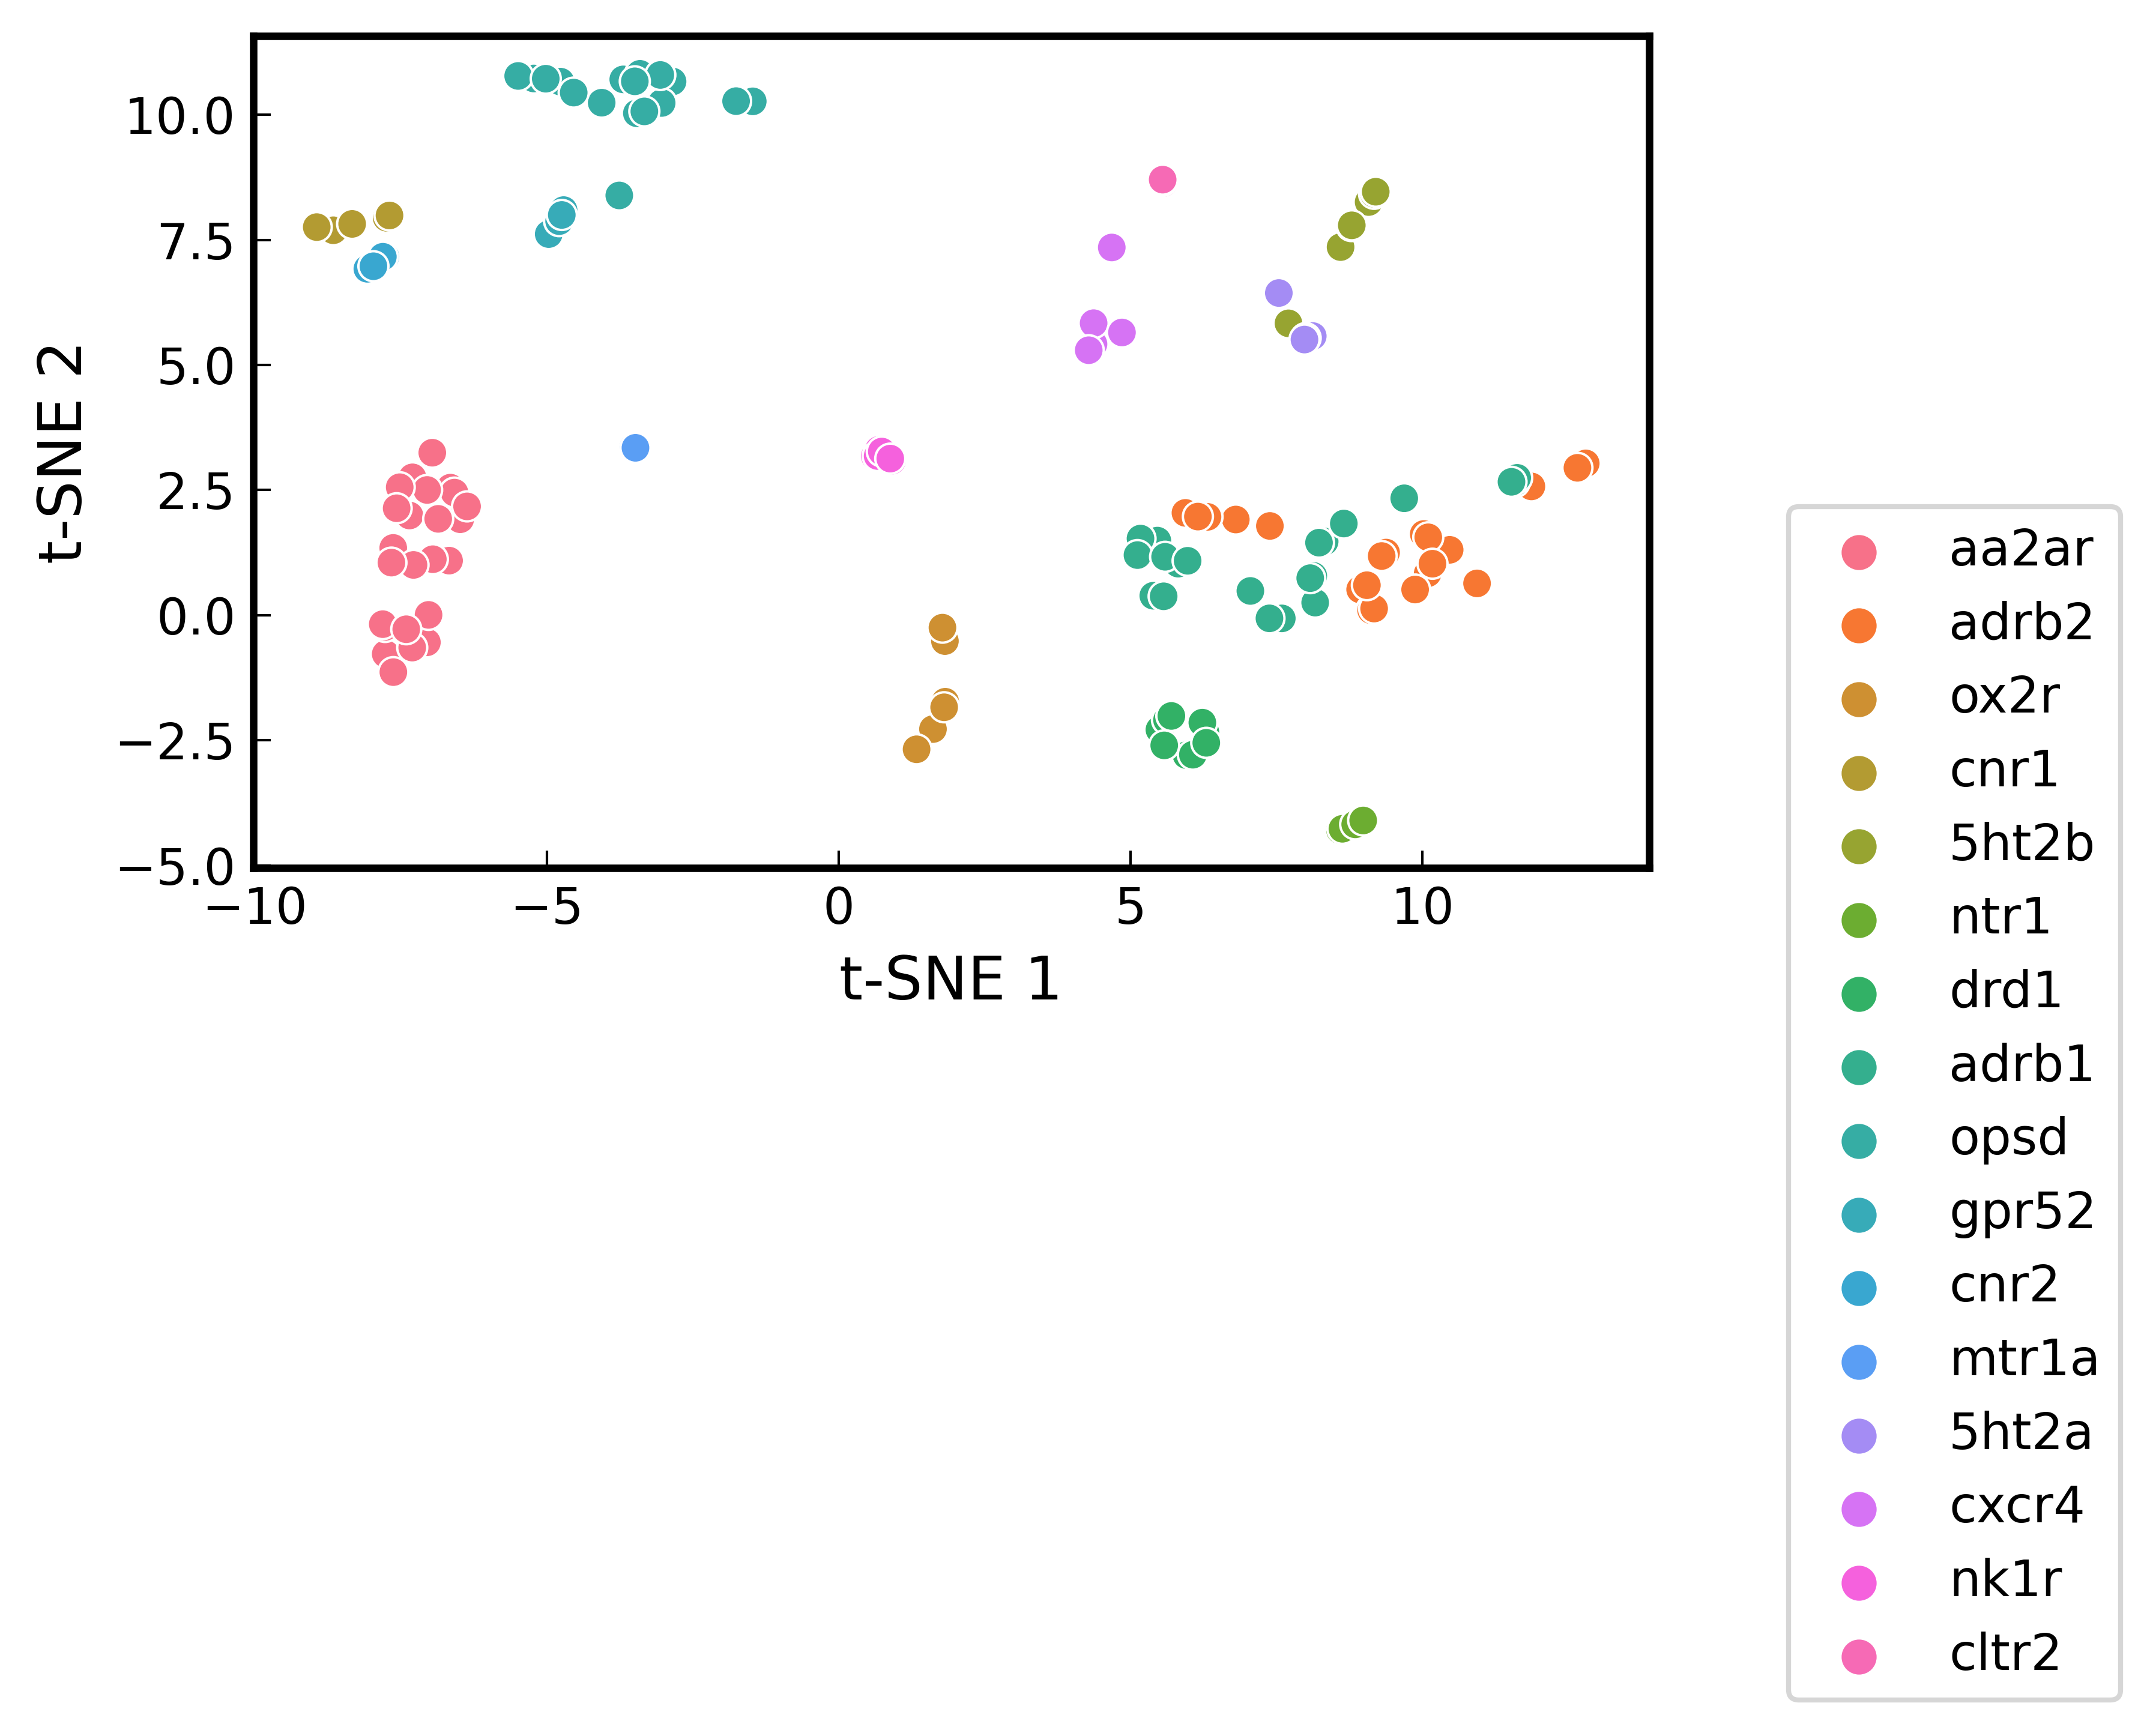

In [25]:
tsne_class(npxxy2_af3, 300, name = 'GPCR')

In [26]:
# plotting h3-h6 distances
def plot_h3_h6(results):
    delta_h3_h6 = results['Delta H3-H6'].values
    width = 1.5
    fig, ax1 = plt.subplots(figsize=[5, 3], dpi=600)

    for axis in ['top', 'bottom', 'left', 'right']:
        ax1.spines[axis].set_linewidth(width)

    tick_width = 0.5
    plt.tick_params(direction='in', width=tick_width)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.xlabel('Activity level (%)', fontsize=12)
    plt.ylabel('$\delta$ H3-H6 (nm)', fontsize=12)
    # Create the scatter plot using seaborn



    scatter_plot = sns.scatterplot(
        y=delta_h3_h6,
        x= results['Activity_level'],
        hue=results['Class'],
        palette='Dark2',
        s = 50,
    )


    # Show the legend
    scatter_plot.legend(title='Class', fontsize=7, title_fontsize=8, loc = 'upper center')



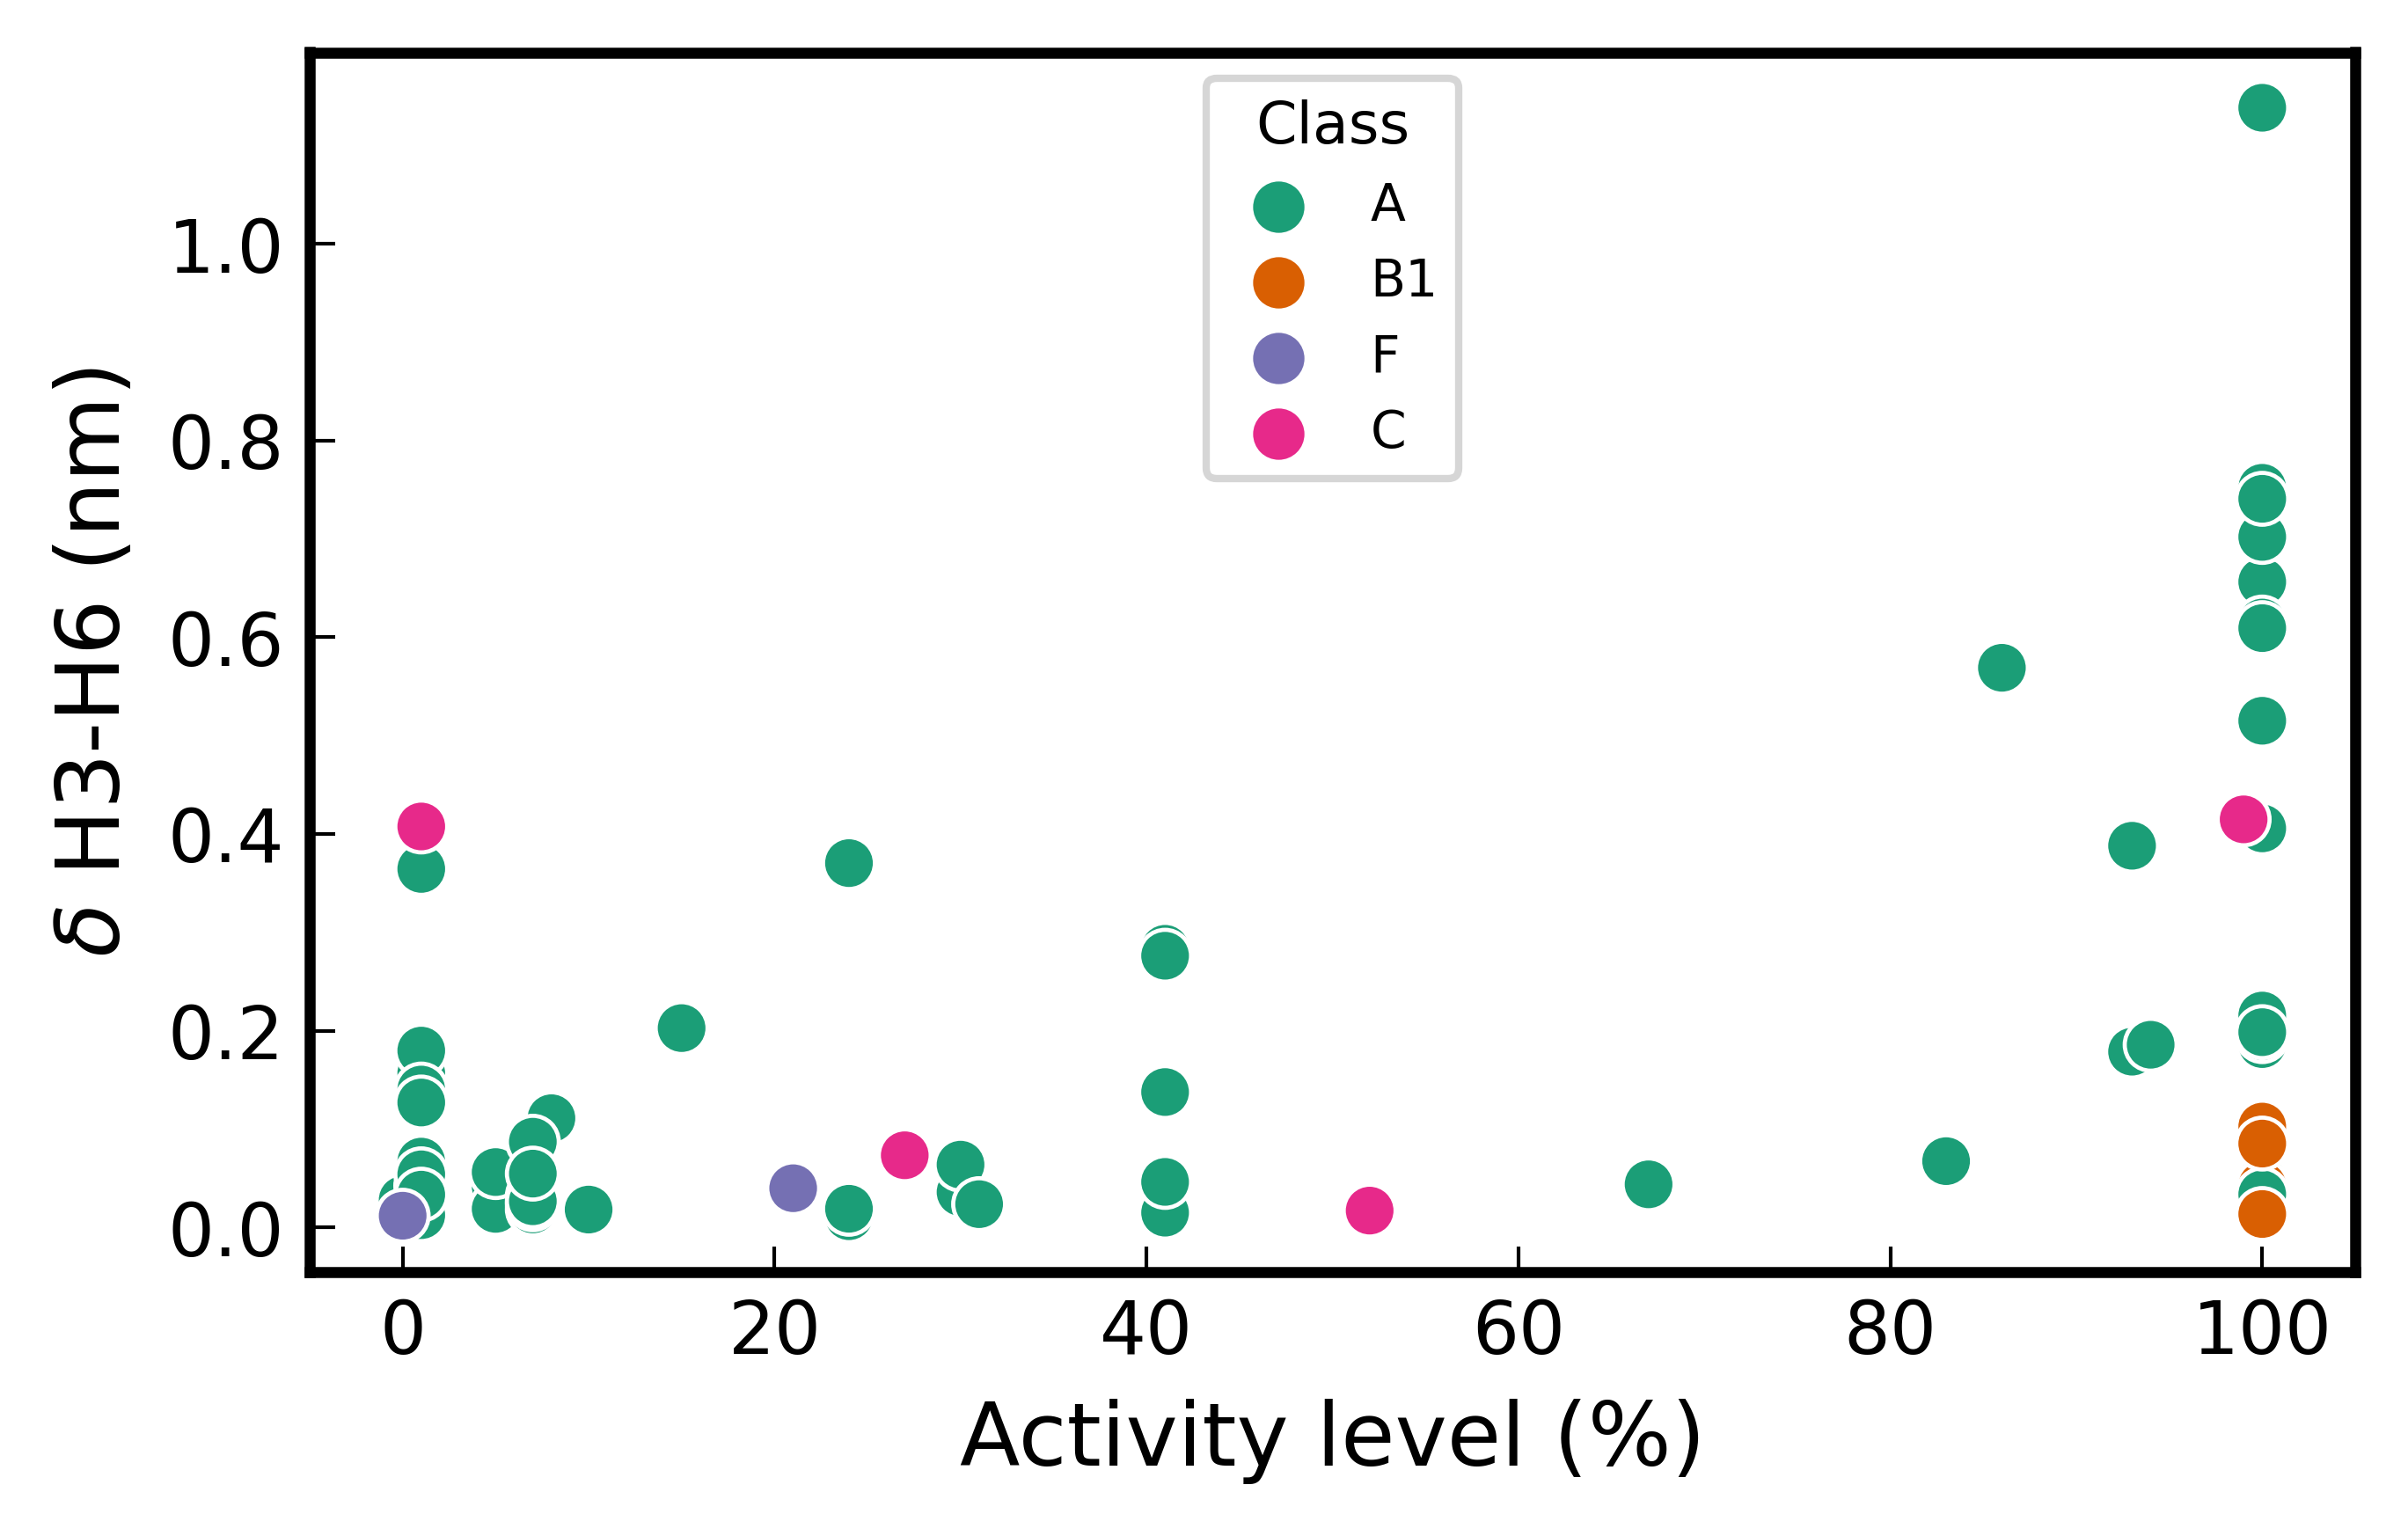

In [27]:
# plotting h3-h6 distances for AF2
plot_h3_h6(final_results_AF2)

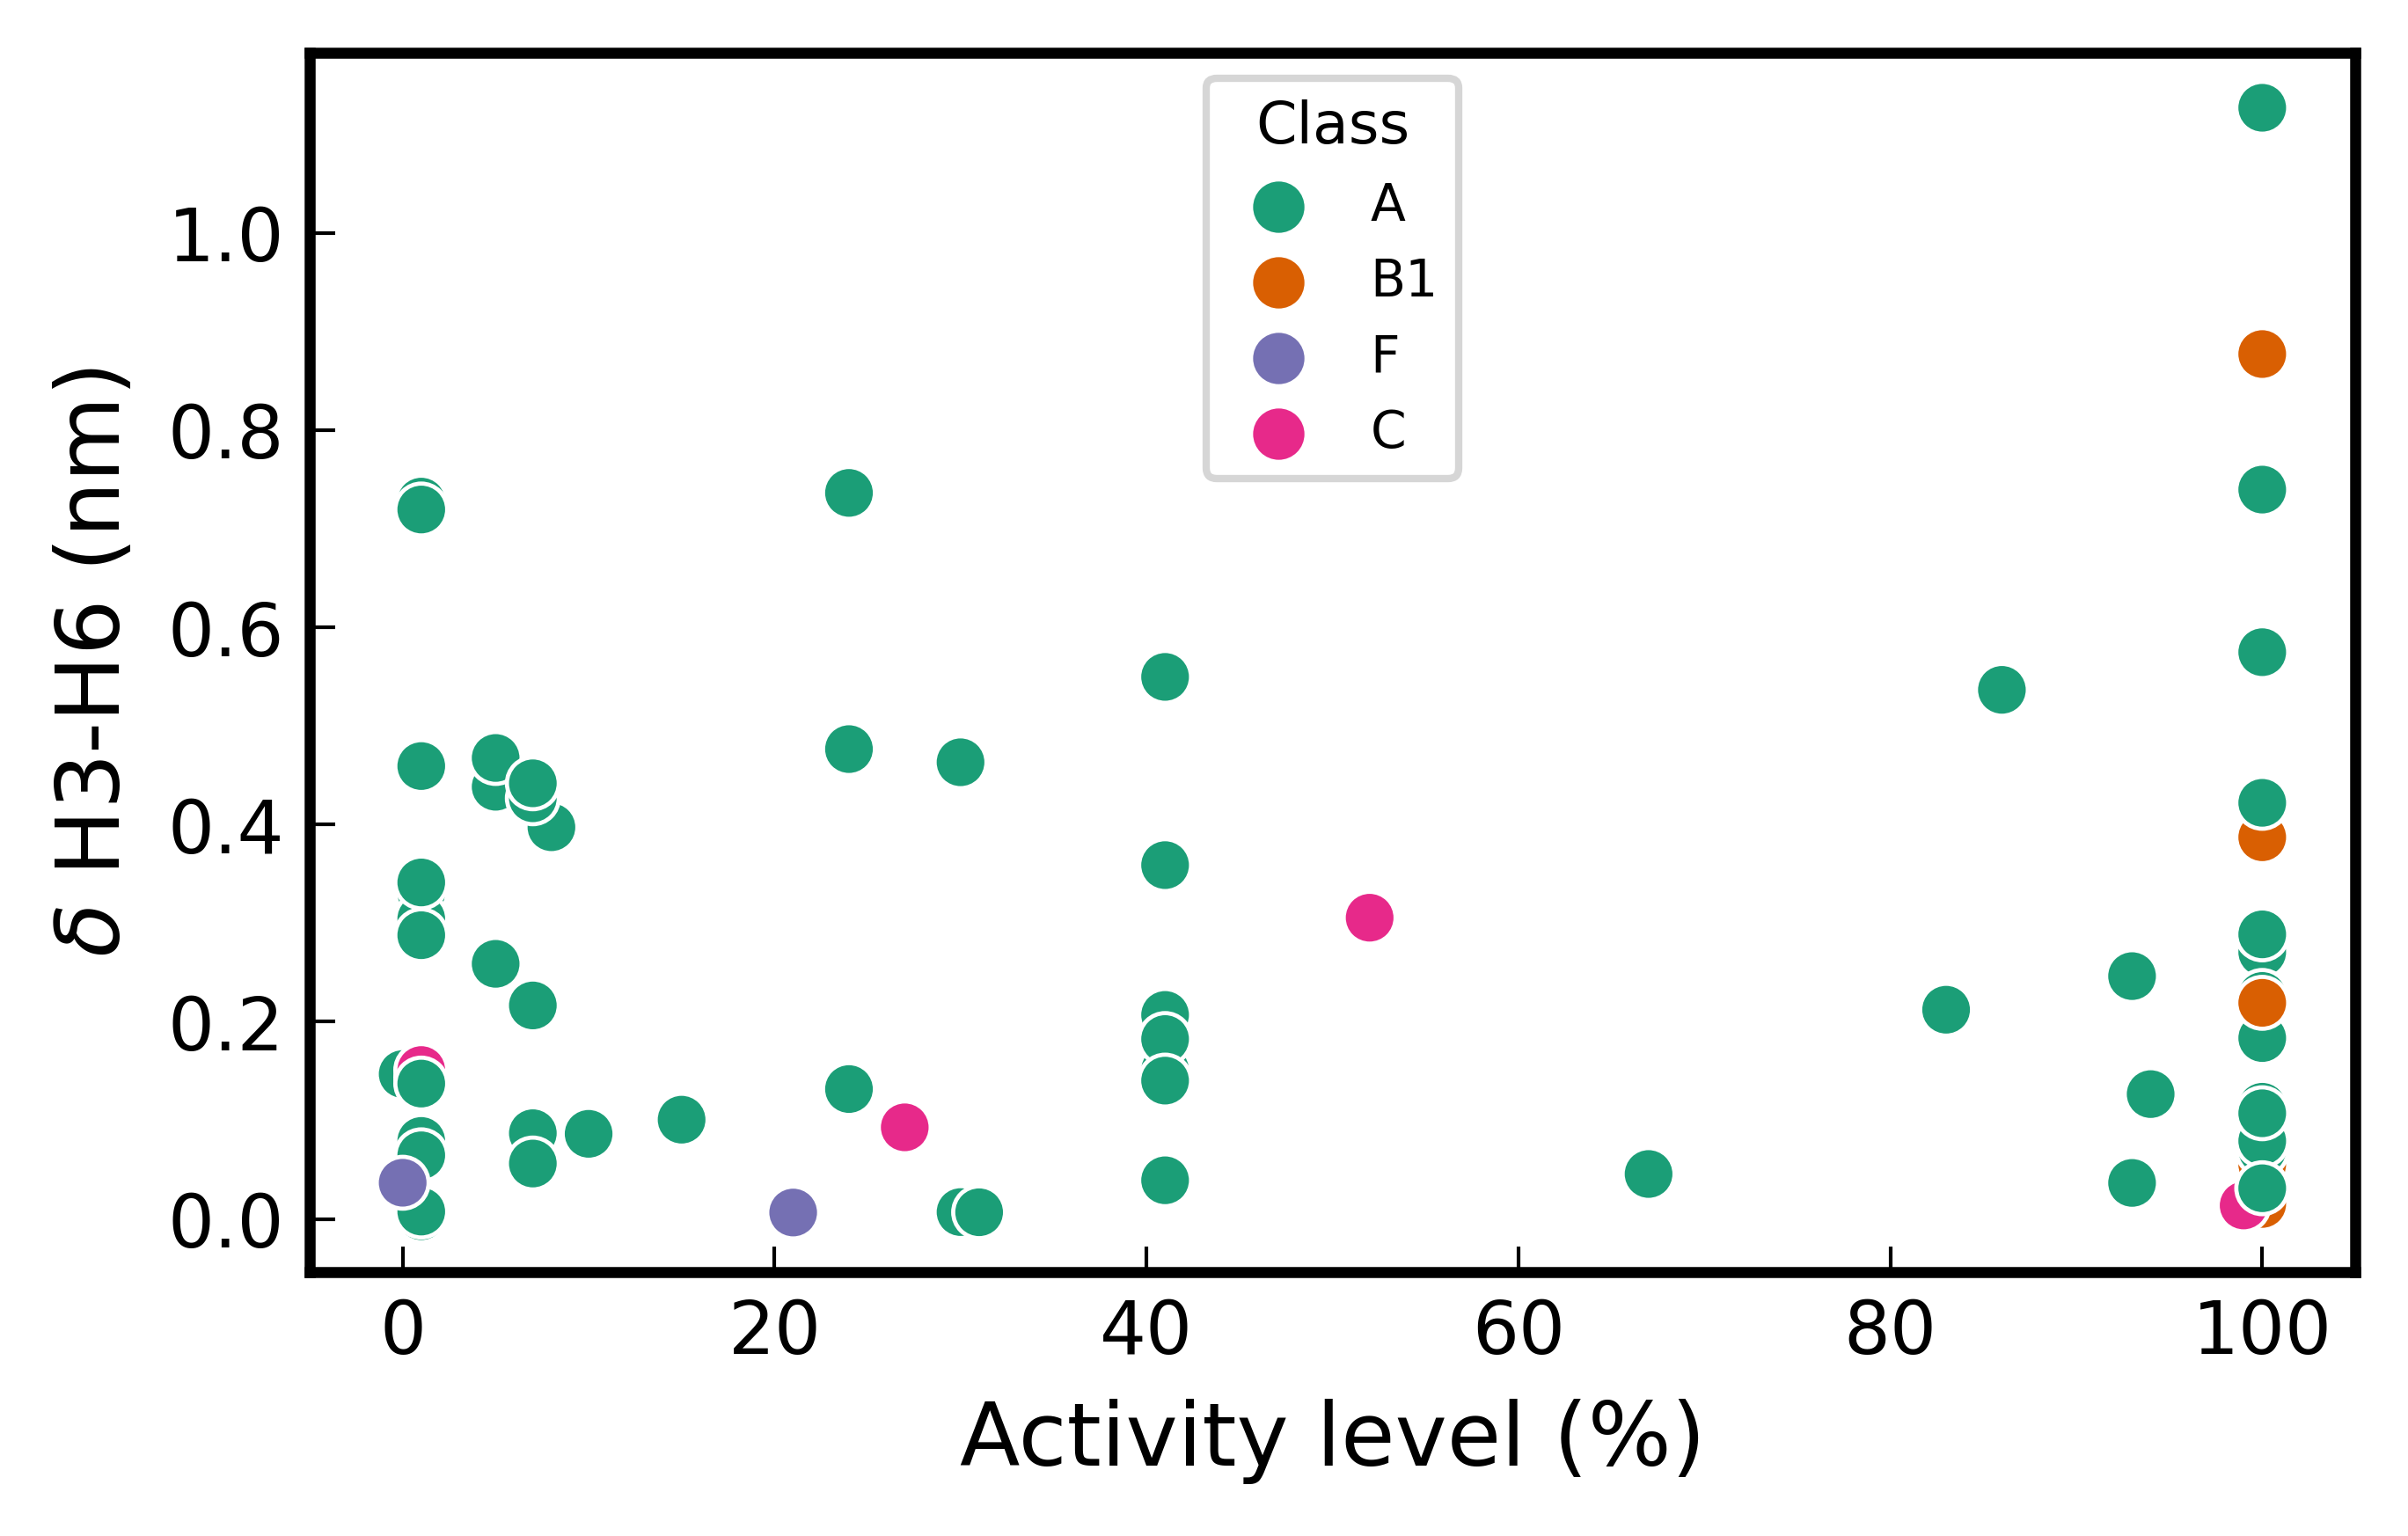

In [28]:
# plotting h3-h6 distances for AF3
plot_h3_h6(final_results_AF3)